<a href="https://colab.research.google.com/github/Xander-tech/Minor-Project/blob/main/Minor_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install ipython-autotime
%load_ext autotime

time: 3.67 ms


In [ ]:
!pip install bing-image-downloader

time: 3.04 s


In [ ]:
!mkdir Minor_img

time: 113 ms


In [ ]:
from bing_image_downloader import downloader
downloader.download('lion', limit=30,  output_dir='Minor_img', adult_filter_off=True)



[!!]Indexing page: 1

[%] Indexed 30 Images on Page 1.


[%] Downloading Image #1 from https://thenationonlineng.net/wp-content/uploads/2019/03/LION.jpg
[%] File Downloaded !

[%] Downloading Image #2 from https://tejanimals.files.wordpress.com/2013/05/lion-king-of-the-jungle.jpg
[%] File Downloaded !

[%] Downloading Image #3 from http://www.hdnicewallpapers.com/Walls/Big/Lion/Lion_in_Gir_Forest_National_Park_India.jpg
[%] File Downloaded !

[%] Downloading Image #4 from https://static.standard.co.uk/s3fs-public/thumbnails/image/2020/08/07/09/worldlionday2020-4.jpg
[%] File Downloaded !

[%] Downloading Image #5 from https://www.zsl.org/sites/default/files/image/2014-05/Asian-lion-in-wild-3.jpg
[%] File Downloaded !

[%] Downloading Image #6 from https://www.unilad.co.uk/wp-content/uploads/2015/12/Lion.jpg
[%] File Downloaded !

[%] Downloading Image #7 from https://www.futurity.org/wp/wp-content/uploads/2014/01/lion_africa_1170.jpg
[%] File Downloaded !

[%] Downloading Image #8 fr

In [ ]:
downloader.download('cheetah', limit=30,  output_dir='Minor_img', adult_filter_off=True)



[!!]Indexing page: 1

[%] Indexed 30 Images on Page 1.


[%] Downloading Image #1 from http://weknowyourdreams.com/images/cheetah/cheetah-03.jpg
[%] File Downloaded !

[%] Downloading Image #2 from https://upload.wikimedia.org/wikipedia/commons/thumb/6/6a/Cheetah_Umfolozi_SouthAfrica_MWegmann.jpg/1200px-Cheetah_Umfolozi_SouthAfrica_MWegmann.jpg
[%] File Downloaded !

[%] Downloading Image #3 from http://weknowyourdreams.com/images/cheetah/cheetah-11.jpg
[%] File Downloaded !

[%] Downloading Image #4 from https://www.coolkidfacts.com/wp-content/uploads/2015/12/cheetah-facts.jpg
[%] File Downloaded !

[%] Downloading Image #5 from http://upload.wikimedia.org/wikipedia/commons/3/36/Cheetah_(Acinonyx_jubatus)_female_2.jpg
[%] File Downloaded !

[%] Downloading Image #6 from https://worldwideexperience.com/wp-content/uploads/2019/10/cheetah.jpg
[%] File Downloaded !

[%] Downloading Image #7 from https://weknowyourdreams.com/images/cheetah/cheetah-01.jpg
[!] Issue getting: https://weknow

In [ ]:
import os
import matplotlib.pyplot as plt
import numpy as np
from skimage.io import imread
from skimage.transform import resize

time: 920 ms


In [ ]:
target=[]
images=[]
flat_data=[]

DATADIR='/content/Minor_img'
CATEGORIES=['lion','cheetah']

for category in CATEGORIES:
  class_num=CATEGORIES.index(category)
  path=os.path.join(DATADIR,category)
  for img in os.listdir(path):
    img_array=imread(os.path.join(path,img))
    #print(img_array.shape)
    #plt.imshow(img_array)
    img_resized=resize(img_array,(150,150,3))
    flat_data.append(img_resized.flatten())
    images.append(img_resized)
    target.append(class_num)

flat_data-=np.array(flat_data)
target=np.array(target)
images=np.array(images)


time: 1min 10s


In [ ]:
len(flat_data[0])

67500

time: 2.93 ms


In [ ]:
target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

time: 4.49 ms


<BarContainer object of 2 artists>

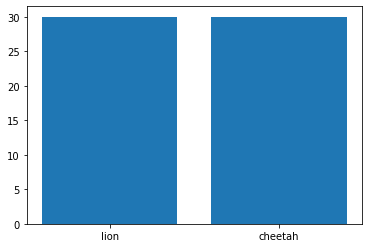

time: 155 ms


In [ ]:
unique,count=np.unique(target,return_counts=True)
plt.bar(CATEGORIES,count)

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(flat_data,target,test_size=0.2,random_state=108)

time: 217 ms


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm
param_grid=[
                                   {'C':[1,10,100,1000],'kernel':['linear']},
                                   {'C':[1,10,100,1000],'gamma':[0.001,0.0001],'kernel':['rbf']},                           
]
svc=svm.SVC(probability=True)
clf=GridSearchCV(svc,param_grid)
clf.fit(x_train,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=True, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

time: 53.2 s


In [ ]:
y_pred=clf.predict(x_test)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

time: 70 ms


In [ ]:
y_test

array([0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0])

time: 3.23 ms


In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix
accuracy_score(y_pred,y_test)

0.5

time: 4.02 ms


In [ ]:
confusion_matrix(y_pred,y_test)

array([[0, 0],
       [6, 6]])

time: 4.93 ms


In [ ]:
import pickle
pickle.dump(clf,open('img_model.p','wb'))

time: 53.3 ms


In [ ]:
model=pickle.load(open('img_model.p','rb'))

time: 18 ms


Enter your URLhttps://nationalzoo.si.edu/sites/default/files/animals/cheetah-002.jpg
(840, 1400, 3)
PREDICTED OUTPUT:cheetah


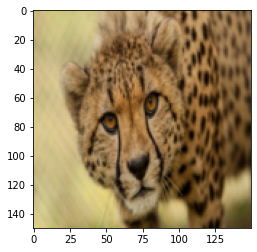

time: 29.7 s


In [ ]:
flat_data=[]
url=input('Enter your URL')
img=imread(url)
img_resized=resize(img,(150,150,3))
flat_data.append(img_resized.flatten())
flat_data=np.array(flat_data)
print(img.shape)
plt.imshow(img_resized)
y_out=model.predict(flat_data)
y_out=CATEGORIES[y_out[0]]
print(f'PREDICTED OUTPUT:{y_out}')


In [ ]:
!pip install streamlit
!pip install pyngrok
from pyngrok import ngrok

     |████████████████████████████████| 7.4MB 2.3MB/s 
     |████████████████████████████████| 112kB 46.3MB/s 
     |████████████████████████████████| 4.5MB 40.6MB/s 
     |████████████████████████████████| 6.7MB 43.6MB/s 
     |████████████████████████████████| 163kB 47.3MB/s 
     |████████████████████████████████| 102kB 10.1MB/s 
     |████████████████████████████████| 102kB 10.1MB/s 
     |████████████████████████████████| 122kB 48.1MB/s 
     |████████████████████████████████| 71kB 7.0MB/s 
     |████████████████████████████████| 71kB 7.7MB/s 
  Created wheel for blinker: filename=blinker-1.4-cp36-none-any.whl size=13450 sha256=ea392bce9897efcd30dca8e87976f2c06d601954f098301f4b275a5dfcbc3404
  Stored in directory: /root/.cache/pip/wheels/92/a0/00/8690a57883956a301d91cf4ec999cc0b258b01e3f548f86e89
  Created wheel for watchdog: filename=watchdog-0.10.3-cp36-none-any.whl size=73873 sha256=3b41a39e504b1f46e79e1258f00108c97508c8679b24c7abed8a8f192b5857ad
  Stored in directory: /root/.c

  Created wheel for pyngrok: filename=pyngrok-5.0.0-cp36-none-any.whl size=18780 sha256=1c068d7ca1346656a688626b4d4b46c4103868abe596cc52c344ea6ca8177ab3
  Stored in directory: /root/.cache/pip/wheels/95/df/23/af8dde08c3fcdc7b966adcacef48ab29aa3b0b1860df5d2b79
Successfully built pyngrok
time: 25.6 s
